In [81]:
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.balance_dataset import *
from utils.linkage import *
from model.balancehc import balancehc

from utils.poincare import *
import scib
import shutil



In [82]:
cell_path1 = './datas/23/2/BRCA_GSE110686.h5ad'
folder_path1 = './datas/23/2/'
radius1 = 0
c1 =0
epoches1 =20
cell_path2 = "./datas/23/3/CRC_GSE146771.h5ad" 
folder_path2 = "./datas/23/3/" 
radius2 = 0
c2 =0
epoches2 = 20
contin = False
resolution=1
method='average'
alignment=1
n_pca=50
meta_col = 'Celltype..major.lineage.'
mst = True


In [83]:
datas = sc.read_h5ad(cell_path1)
datas
sc.pp.filter_cells(datas, min_genes=200)
sc.pp.filter_genes(datas, min_cells=3)
sc.pp.normalize_total(datas, exclude_highly_expressed=True)
sc.pp.log1p(datas)
sc.pp.highly_variable_genes(
    datas,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
    n_top_genes=2000
)
datas.raw = datas
datas._inplace_subset_var(datas.var['highly_variable'])

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning:

Element '/obs/orig.ident' was written without encoding metadata.

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning:

Element '/obs/nCount_RNA' was written without encoding metadata.

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning:

Element '/obs/nFeature_RNA' was written without encoding metadata.

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning:

Element '/obs/UMAP_1' was written without encoding metadata.

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning:

Element '/obs/UMAP_2' was written without encoding metadata.

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning:

In [39]:
sc.tl.pca(
    datas,
    n_comps=50,
    random_state=1234,
)
sc.pp.neighbors(datas,
                n_neighbors=30,
                random_state=1234
                )
sc.tl.diffmap(datas,random_state=1234)
sc.tl.umap(datas,random_state=1234)
sc.tl.leiden(datas,random_state=1234,resolution = 0.5)
sc.tl.paga(datas, groups='leiden')

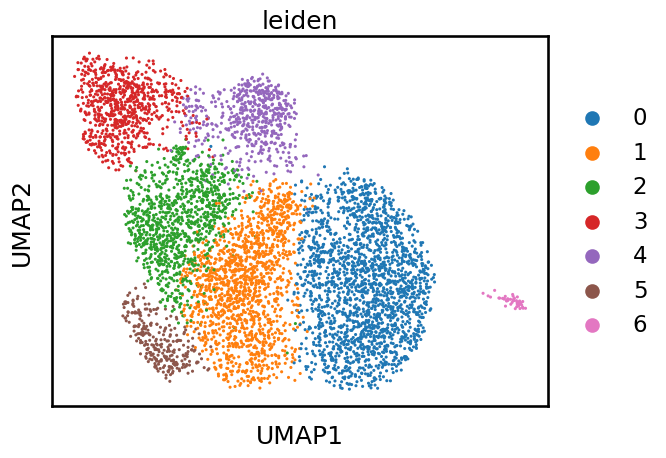

In [40]:
sc.pl.umap(datas,color='leiden')

In [6]:
datas

AnnData object with n_obs × n_vars = 6035 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [41]:
common = datas[datas.obs[datas.obs['leiden'].isin(['0','1','2','3','6','7','8','9'])].index]
common

View of AnnData object with n_obs × n_vars = 5208 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [42]:
dataset1 = datas[datas.obs[datas.obs['leiden'].isin(['4'])].index]
dataset1

View of AnnData object with n_obs × n_vars = 558 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [43]:
dataset2 = datas[datas.obs[datas.obs['leiden'].isin(['5'])].index]
dataset2

View of AnnData object with n_obs × n_vars = 269 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [44]:
dataset1

View of AnnData object with n_obs × n_vars = 558 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [45]:
common

View of AnnData object with n_obs × n_vars = 5208 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [46]:
common1 = common.copy()
sample = common1.obs.sample(n=int(len(common)/2), random_state=42)
common1 = common1[sample.index]
common2 = common[common.obs.index[~common.obs.index.isin(common1.obs.index)]]
common1,common2

(View of AnnData object with n_obs × n_vars = 2604 × 2000
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
     var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
     obsm: 'X_pca', 'X_diffmap', 'X_umap'
     varm: 'PCs'
     obsp: 'distances', 'connectivities',
 View of AnnData object with n_obs × n_vars = 2604 × 2000
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
     var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'log1p', 'hvg', 'pca', 'nei

In [54]:
f1 = dataset1.concatenate(common1)
f2 = dataset2.concatenate(common2)


/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning:

X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning:

X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.



In [55]:
f1.write_h5ad('./datas/miss/1/f1.h5ad')
f2.write_h5ad('./datas/miss/2/f2.h5ad')

In [56]:
cell_path1 = './datas/miss/1/f1.h5ad'
folder_path1 = './datas/miss/1/'
radius1 = 0
c1 =0
epoches1 =20
cell_path2 = "./datas/miss/2/f2.h5ad" 
folder_path2 = "./datas/miss/2/" 
radius2 = 0
c2 =0
epoches2 = 20
contin = False
resolution= 1
method='average'
alignment=1
n_pca=50
meta_col = 'Celltype..major.lineage.'
mst = False


In [57]:
folder_path1 = './datas/miss/1/'
folder_path2 = './datas/miss/2/'
inter_gene = sort_data(f1,f2,1000,1000)


In [58]:
tmp1 = calculate_cluster_centroid_for_genes(f1,inter_gene,'./datas/miss/1/')
tmp2 = calculate_cluster_centroid_for_genes(f2,inter_gene,'./datas/miss/2/')

In [60]:
f1.obs['celltype']=f1.obs['Celltype..major.lineage.']
f2.obs['celltype']=f2.obs['Celltype..major.lineage.']

In [61]:
get_Hyper_tree(folder_path1+'datas.data',1,tmp1.shape[1]+1,0,20,10,save_path=folder_path1)


./datas/miss/1/datas.data length:6
Generating all pairs superset
	 Epoch 0 | average train loss: 0.945256
Optimization finished.
	 Epoch 1 | average train loss: 0.930203
Optimization finished.
	 Epoch 2 | average train loss: 0.923223
Optimization finished.
	 Epoch 3 | average train loss: 0.922211
Optimization finished.
	 Epoch 4 | average train loss: 0.925490
Optimization finished.
	 Epoch 5 | average train loss: 0.923515
Optimization finished.
	 Epoch 6 | average train loss: 0.923761
Optimization finished.
	 Epoch 7 | average train loss: 0.923099
Optimization finished.
	 Epoch 8 | average train loss: 0.925907
Optimization finished.
	 Epoch 9 | average train loss: 0.922499
Optimization finished.
	 Epoch 10 | average train loss: 0.923046
Optimization finished.
	 Epoch 11 | average train loss: 0.922956
Optimization finished.
	 Epoch 12 | average train loss: 0.926599
Optimization finished.
	 Epoch 13 | average train loss: 0.921607
Optimization finished.
	 Epoch 14 | average train loss: 0.

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:4: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:10: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

	 Epoch 1 | average train loss: 0.368028
	 Epoch 2 | average train loss: 0.358330
	 Epoch 3 | average train loss: 0.362583
	 Epoch 4 | average train loss: 0.355235
	 Epoch 5 | average train loss: 0.355197
	 Epoch 6 | average train loss: 0.354282
	 Epoch 7 | average train loss: 0.353962
	 Epoch 8 | average train loss: 0.353979
	 Epoch 9 | average train loss: 0.354266


In [62]:
get_Hyper_tree(folder_path2+'datas.data',1,tmp2.shape[1]+1,0,20,10,save_path=folder_path2)


./datas/miss/2/datas.data length:6
Generating all pairs superset
	 Epoch 0 | average train loss: 0.949633
Optimization finished.
	 Epoch 1 | average train loss: 0.929437
Optimization finished.
	 Epoch 2 | average train loss: 0.924630
Optimization finished.
	 Epoch 3 | average train loss: 0.924844
Optimization finished.
	 Epoch 4 | average train loss: 0.926187
Optimization finished.
	 Epoch 5 | average train loss: 0.928843
Optimization finished.
	 Epoch 6 | average train loss: 0.927456
Optimization finished.
	 Epoch 7 | average train loss: 0.927694
Optimization finished.
	 Epoch 8 | average train loss: 0.930187
Optimization finished.
	 Epoch 9 | average train loss: 0.926695
Optimization finished.
	 Epoch 10 | average train loss: 0.929597
Optimization finished.
	 Epoch 11 | average train loss: 0.927475
Optimization finished.
	 Epoch 12 | average train loss: 0.926999
Optimization finished.
	 Epoch 13 | average train loss: 0.929300
Optimization finished.
	 Epoch 14 | average train loss: 0.

In [79]:
nodes1 = build_hyper_tree_from_folder(folder_path1,mst)
nodes2 = build_hyper_tree_from_folder(folder_path2,mst)

nodes1[0] = search_tree(nodes1[0],0.1)
nodes2[0] = search_tree(nodes2[0],0.7)
T=tree_alignment(nodes1[0],nodes2[0],1);
minn = T.run_alignment();
T.show_ans();
ans = T.get_ans()
G=show_graph(ans,nodes1[0],nodes2[0]);
# G.show_fig()
G.save_fig(folder_path1+'alignment.png')
G.save_fig(folder_path2+'alignment.png')

n1 =len(nodes1)
n2 =len(nodes2)

print("average cost for one node:{}\n".format(minn/(n1+n2)))

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:748: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:748: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for a

The mininum cost for alignment is 8.817430972388955
The alignment edges list is [('10', '10'), ('8', '9'), ('7', '6'), ('6', '1'), ('0', '0'), ('2', '2'), ('4', '4'), ('5', '5')]
average cost for one node:0.4007923169267707



In [80]:
G.show_fig()